In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [ ]:
#maxvoting, average, weighted average voting
#classification

In [22]:
x,y = make_moons(n_samples = 1000, noise = 0.2)

In [23]:
df = {"x1" : x[:,0], "x2": x[:,1], "y" : y}

In [24]:
dataset = pd.DataFrame(df)

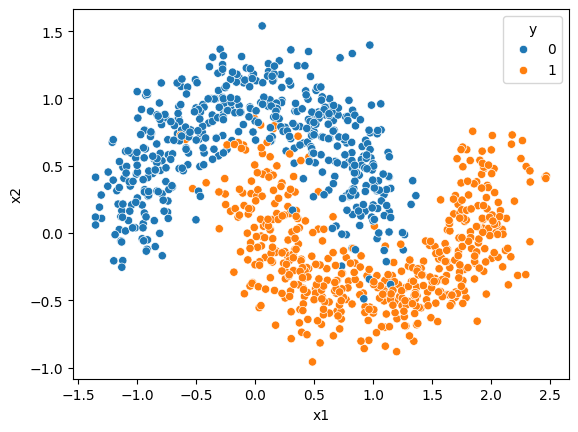

In [25]:
sns.scatterplot(x = "x1", y = "x2", data = dataset, hue = "y")
plt.show()

In [26]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size = 0.2, random_state = 42)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [37]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100

(93.0, 100.0)

In [38]:
svm = SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)*100, svm.score(x_train, y_train)*100

(96.0, 96.0)

In [39]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test, y_test)*100, gnb.score(x_train, y_train)*100

(89.0, 86.625)

In [40]:
from sklearn. ensemble import VotingClassifier

In [42]:
li = [("dt1", DecisionTreeClassifier()),("sv1",SVC()),("gnb1", GaussianNB())]

In [44]:
vc = VotingClassifier(li)
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [46]:
vc.score(x_test, y_test)*100, vc.score(x_train, y_train)*100

(96.5, 96.5)

In [53]:
prd = {"dt":dt.predict(x_test), "svm":svm.predict(x_test), "gnb":gnb.predict(x_test), "vc":vc.predict(x_test)}

In [54]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
195,0,0,0,0
196,0,0,0,0
197,1,1,1,1
198,0,0,0,0


In [55]:
#regression
ds = pd.read_csv("Placement.csv")
ds.head(4)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67


In [56]:
x = ds.iloc[:,:-1]
y = ds["package"]

In [110]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [61]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100, lr.score(x_train, y_train)*100

(77.30984312051673, 77.58339025733345)

In [62]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr.score(x_test, y_test)*100, dtr.score(x_train, y_train)*100

(52.19733481708333, 95.1559200955432)

In [66]:
svr = SVR()
svr.fit(x_train, y_train)
svr.score(x_test, y_test)*100, svr.score(x_train, y_train)*100

(75.94945442913415, 78.16909319813372)

In [67]:
from sklearn.ensemble import VotingRegressor

In [71]:
l = [("lr1", LinearRegression()),("dtr1", DecisionTreeRegressor()), ("svr1", SVR())]

In [75]:
vr = VotingRegressor(l)
vr.fit(x_train, y_train)

VotingRegressor(estimators=[('lr1', LinearRegression()),
                            ('dtr1', DecisionTreeRegressor()),
                            ('svr1', SVR())])

In [76]:
vr.score(x_test, y_test)*100, vr.score(x_train, y_train)*100

(75.16568331690885, 87.56852979319457)

In [83]:
df = {"lr":lr.predict(x_test), "dtr": dtr.predict(x_test), "svr": svr.predict(x_test), "vr": vr.predict(x_test)}

In [84]:
pd.DataFrame(df).head(3)

,lr,dtr,svr,vr
0,2.780313,2.9200,2.745462,2.815259
1,3.136352,3.2525,3.111375,3.166742
2,3.199521,2.9200,3.186923,3.102148


In [86]:
(2.780313+2.9200+2.745462)/3

2.815258333333333

#Bagging algo - Meta Estimator, random forest(classification)

In [87]:
from sklearn.datasets import make_moons

In [88]:
x,y = make_moons(n_samples = 1000, noise = 0.2)

In [89]:
df = {"x1" : x[:,0], "x2": x[:,1], "y" : y}

In [90]:
dataset = pd.DataFrame(df)

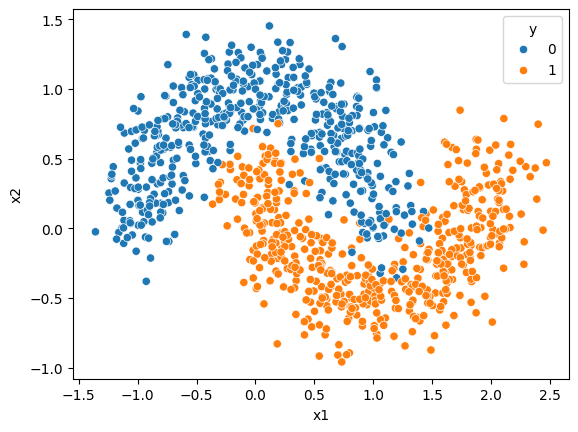

In [91]:
sns.scatterplot(x = "x1", y = "x2", data = dataset, hue = "y")
plt.show()

In [92]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [93]:
from sklearn.model_selection import train_test_split 

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size = 0.2, random_state = 42)

In [97]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [105]:
bg = BaggingClassifier(estimator = SVC(), n_estimators = 50)
bg.fit(x_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=50)

In [106]:
bg.score(x_test, y_test)*100, bg.score(x_train, y_train)*100

(98.0, 97.625)

In [107]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [108]:
rf.score(x_test, y_test)*100, rf.score(x_train, y_train)*100

(98.0, 100.0)

In [109]:
#regression
ds = pd.read_csv("Placement.csv")
ds.head(4)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67


In [111]:
x = ds.iloc[:,:-1]
y = ds["package"]

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [116]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [118]:
bg = BaggingRegressor(estimator= LinearRegression(),n_estimators=30)
bg.fit(x_train, y_train)

BaggingRegressor(estimator=LinearRegression(), n_estimators=30)

In [119]:
bg.score(x_test, y_test)*100, bg.score(x_train, y_train)*100

(77.30675998932371, 77.58269314134519)

In [125]:
rr = RandomForestRegressor(n_estimators=50)
rr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50)

In [121]:
rr.score(x_test, y_test)*100, rr.score(x_train, y_train)*100

(66.28417330141578, 91.76409055418848)